#数据采样算法

#自适应降采样算法（根据数据的斜率变化自适应地选择降采样点。在陡峭的斜率变化处保留更多的数据点，而在平缓的区域减少数据点密度）

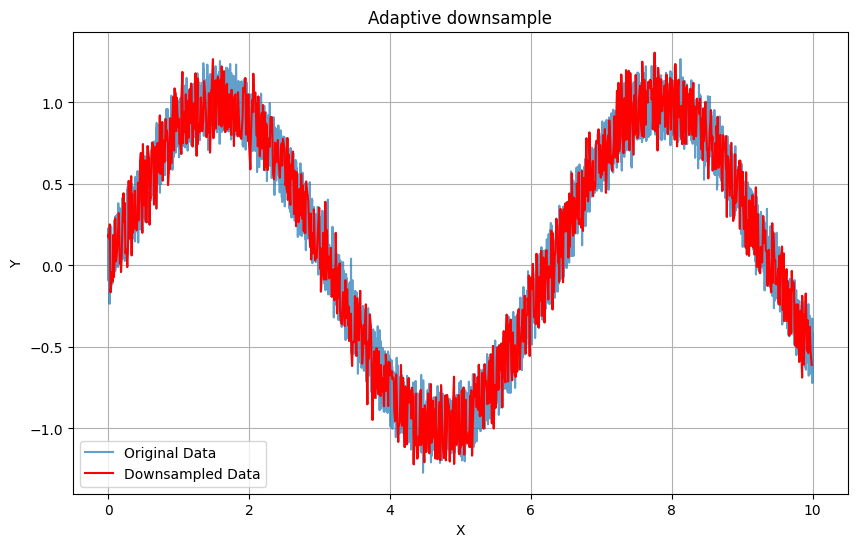

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def adaptive_downsample(x, y, target_points):
    num_points = len(x)
    if num_points <= target_points:
        return x, y  # 若原始数据点数不超过目标采样点数，则无需降采样

    # 计算斜率的变化率
    slope = np.abs(np.diff(y))

    # 根据斜率的变化率选择降采样点
    indices_to_keep = [0] 
    remaining_points = target_points - 1
    ratio = num_points / target_points
    for i in range(1, target_points):
        start_index = int((i - 1) * ratio)
        end_index = int(i * ratio)
        segment_slope = slope[start_index:end_index]
        max_slope_index = np.argmax(segment_slope)
        selected_index = start_index + max_slope_index
        
        # 确保所有的采样数据点在原数据内
        while x[selected_index] > x[-1]:
            selected_index -= 1
        
        indices_to_keep.append(selected_index)

    # 根据索引选择要保留的数据点
    downsampled_x = x[indices_to_keep]
    downsampled_y = y[indices_to_keep]

    return downsampled_x, downsampled_y

# 生成随机数据集
np.random.seed(0)
x = np.linspace(0, 10, 10000)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])  # 添加噪声
target_points = 1000  # 目标采样点数

# 进行自适应降采样
downsampled_x, downsampled_y = adaptive_downsample(x, y, target_points)

# 绘制采样前后的数据图表进行对比
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(downsampled_x, downsampled_y,label='Downsampled Data', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Adaptive downsample')
plt.legend()
plt.grid(True)
plt.show()


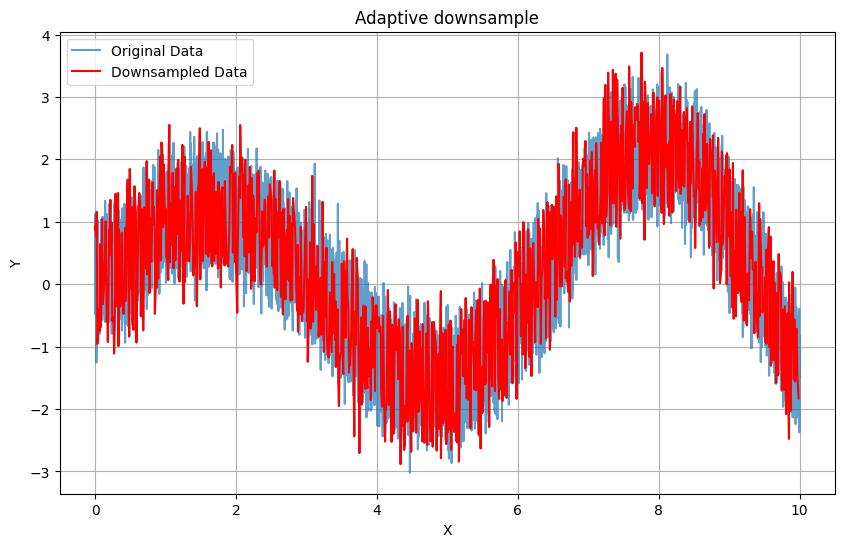

In [26]:
np.random.seed(0)
x = np.linspace(0, 10, 10000)
y = np.sin(x) * np.exp(0.1*x) + np.random.normal(0, 0.5, size=x.shape[0])  
target_points = 1000  # 目标采样点数

downsampled_x, downsampled_y = adaptive_downsample(x, y, target_points)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(downsampled_x, downsampled_y, label='Downsampled Data', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Adaptive downsample')
plt.legend()
plt.grid(True)
plt.show()

#聚类降采样算法（使用k-means将原始数据分成若干簇，然后选择每个簇的代表性数据点作为降采样后的数据点）

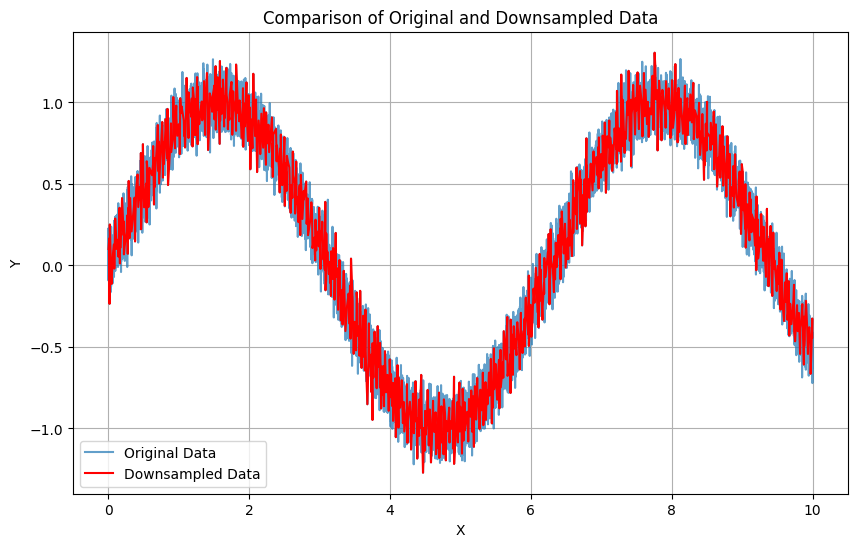

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*found 0 physical cores.*")

def cluster_downsample(x, y, target_points):
    num_points = len(x)
    if num_points <= target_points:
        return x, y  # 若原始数据点数不超过目标采样点数，则无需降采样

    # 合并x和y数据
    data = np.column_stack((x, y))

    # 使用K-means
    kmeans = KMeans(n_clusters=target_points)
    kmeans.fit(data)

    cluster_centers = kmeans.cluster_centers_

    # 根据cluster centers选择要保留的数据点
    indices_to_keep = []
    for center in cluster_centers:
        index = np.argmin(np.linalg.norm(data - center, axis=1))
        indices_to_keep.append(index)

    # 根据索引选择要保留的数据点
    downsampled_x = x[indices_to_keep]
    downsampled_y = y[indices_to_keep]

    return downsampled_x, downsampled_y

# 生成随机数据集
np.random.seed(0)
x = np.linspace(0, 10, 10000)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])  # 添加噪声
target_points = 1000  # 目标采样点数

# 进行基于K-means的降采样
downsampled_x, downsampled_y = cluster_downsample(x, y, target_points)

# 对降采样后的数据点按照 x 值进行排序
sorted_indices = np.argsort(downsampled_x)
downsampled_x_sorted = downsampled_x[sorted_indices]
downsampled_y_sorted = downsampled_y[sorted_indices]

# 绘制采样前后的数据图表进行对比
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(downsampled_x_sorted, downsampled_y_sorted, label='Downsampled Data', color='red', markersize=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Original and Downsampled Data')
plt.legend()
plt.grid(True)
plt.show()

#滑动窗口降采样算法（均匀采样测试）

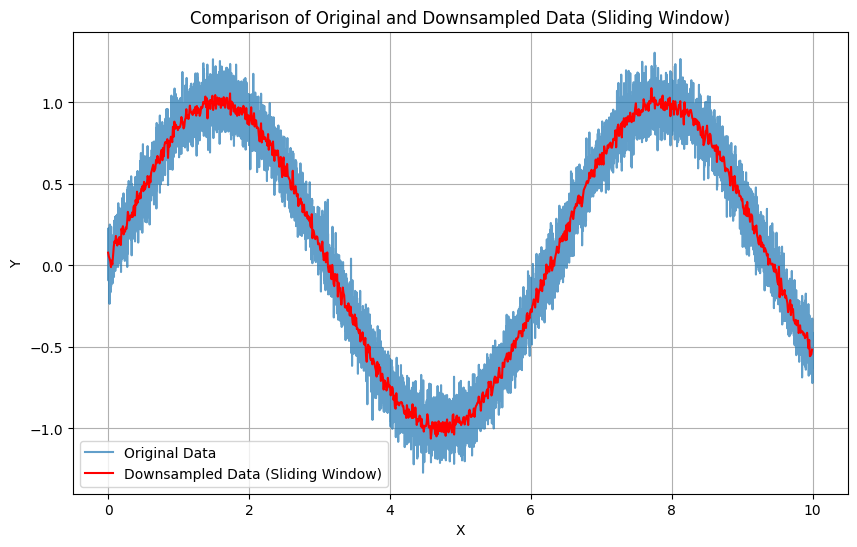

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sliding_window_downsample(x, y, target_points):
    num_points = len(x)
    if num_points <= target_points:
        return x, y  # 如果原始数据点数不超过目标采样点数，则无需降采样

    window_size = num_points // target_points
    downsampled_x = []
    downsampled_y = []

    for i in range(0, num_points, window_size):
        window_x = x[i:i+window_size]
        window_y = y[i:i+window_size]
        window_mean = np.mean(window_y)
        downsampled_x.append(window_x[0])  # 选择窗口的第一个点作为降采样结果的 x 值
        downsampled_y.append(window_mean)

    return np.array(downsampled_x), np.array(downsampled_y)

# 示例数据
np.random.seed(0)
x = np.linspace(0, 10, 10000)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])  # 添加噪声
target_points = 1000  # 目标采样点数

# 进行滑动窗口降采样
downsampled_x, downsampled_y = sliding_window_downsample(x, y, target_points)

# 绘制采样前后的数据图表进行对比
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(downsampled_x, downsampled_y, label='Downsampled Data (Sliding Window)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Original and Downsampled Data (Sliding Window)')
plt.legend()
plt.grid(True)
plt.show()